# **BAC STOCK PREDICTION**
 dataset=["https://finance.yahoo.com/quote/BAC/history"]

---



### **ABOUT DATA**


The BAC dataset likely contains historical stock price data for Bank of America Corporation. It includes attributes like date, open, high, low, close, adjusted close, and volume. Analyzing this data can provide insights into BAC's historical stock performance, including trends and trading volumes over time, useful for financial analysis and forecasting.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [2]:
bac=pd.read_csv("/content/BAC.csv")
bac

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,45.090000,46.490002,44.980000,46.180000,43.460335,58587900
1,2022-01-04,47.060001,48.430000,47.040001,47.990002,45.163738,74606700
2,2022-01-05,48.139999,48.369999,47.160000,47.180000,44.401440,57791600
3,2022-01-06,47.980000,48.160000,47.189999,48.130001,45.295490,52040900
4,2022-01-07,48.150002,49.310001,48.060001,49.180000,46.283653,59082600
...,...,...,...,...,...,...,...
496,2023-12-22,33.209999,33.669998,33.200001,33.430000,33.196156,37258100
497,2023-12-26,33.450001,33.959999,33.369999,33.860001,33.623150,24845400
498,2023-12-27,33.799999,33.950001,33.660000,33.840000,33.603287,24498600
499,2023-12-28,33.820000,33.970001,33.770000,33.880001,33.643009,21799600


In [3]:
bac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       501 non-null    object 
 1   Open       501 non-null    float64
 2   High       501 non-null    float64
 3   Low        501 non-null    float64
 4   Close      501 non-null    float64
 5   Adj Close  501 non-null    float64
 6   Volume     501 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [5]:
bac.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,33.661018,34.053393,33.237725,33.639142,32.345319,4.740675e+07
std,5.533819,5.600835,5.428444,5.506721,4.877201,2.003093e+07
min,25.320000,25.650000,24.959999,25.170000,24.796028,1.581560e+07
25%,29.139999,29.430000,28.820000,29.129999,28.479563,3.509600e+07
50%,32.900002,33.419998,32.570000,32.849998,31.559305,4.319380e+07
75%,36.070000,36.380001,35.689999,36.130001,34.422318,5.353720e+07
max,49.910000,50.110001,49.029999,49.380001,46.471878,2.184033e+08


Data Coverage: The dataset spans 501 trading days.

**Price Levels:**

Mean closing price: $33.64

Standard deviation: $5.51

Minimum and maximum closing prices: $25.17 and $49.38

**Volume:**

Mean trading volume: approximately 47.41 million shares

Standard deviation: approximately 20.03 million shares

Price Distribution:

Median closing price: $32.85


In [7]:
bac['Date'] = pd.to_datetime(bac['Date'])
bac.set_index('Date', inplace=True)

In [8]:
if bac.isnull().values.any():
    bac = bac.dropna()

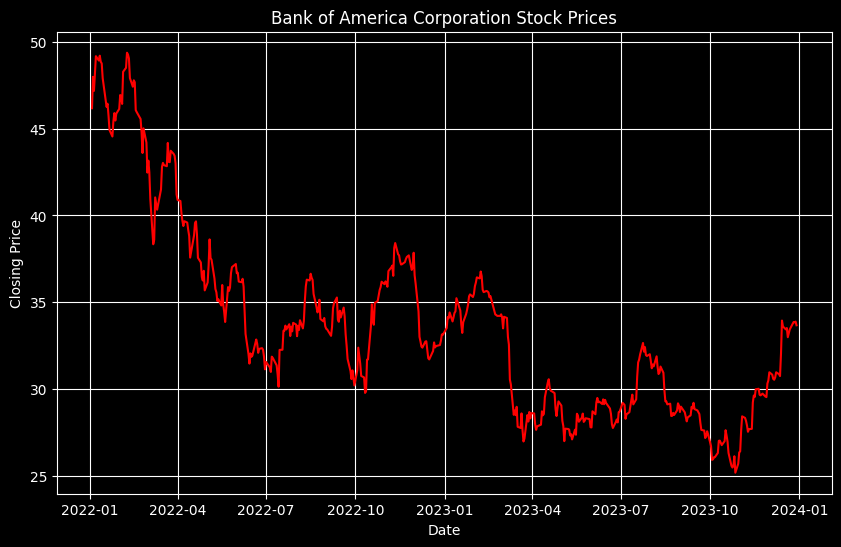

In [42]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.plot(bac['Close'], color='red')
plt.title('Bank of America Corporation Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


### **ACF&PACF**

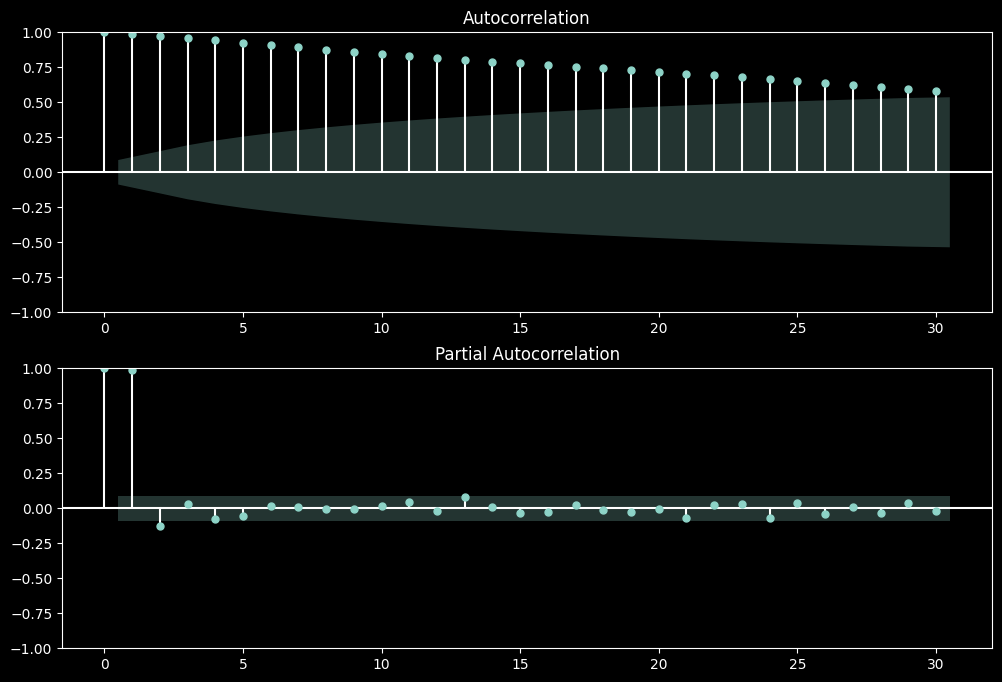

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('dark_background')

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(bac['Close'], lags=30, ax=ax[0])
plot_pacf(bac['Close'], lags=30, ax=ax[1])
plt.show()


In [55]:
lag_orders = [1,2]

In [56]:
train_size = int(len(bac) * 0.8)
train_data, test_data = bac[:train_size], bac[train_size:]

In [57]:
models = [AutoReg(train_data['Close'], lags=lag).fit() for lag in lag_orders]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [58]:
predictions = [model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1) for model in models]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will

In [60]:
combined_predictions = np.mean(predictions, axis=0)

In [59]:
mse = mean_squared_error(test_data['Close'], combined_predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 13.306410568644822


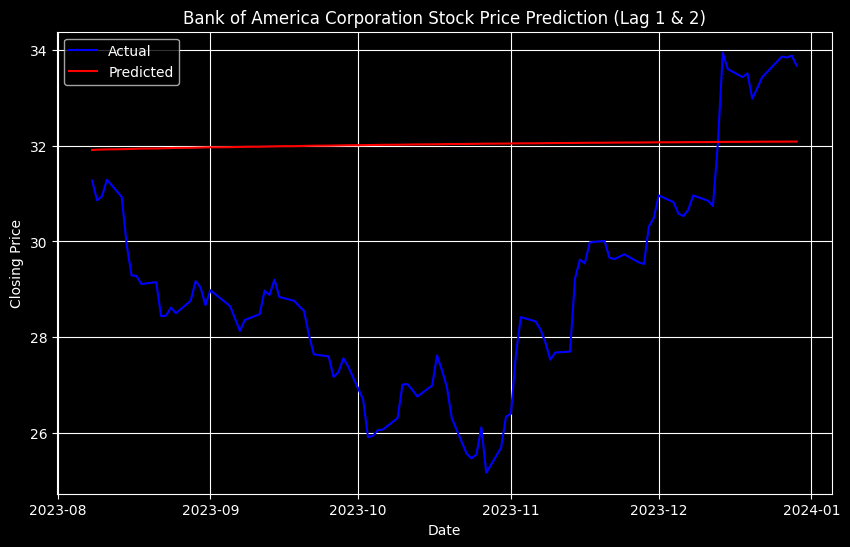

In [39]:
style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual', color='blue')
plt.plot(test_data.index, combined_predictions, label='Predicted', color='red')
plt.title('Bank of America Corporation Stock Price Prediction (Lag 1 & 2)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data['Close'], combined_predictions)
mse = mean_squared_error(test_data['Close'], combined_predictions)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Absolute Error (MAE): 3.3208977567630846
Mean Squared Error (MSE): 13.829504132947617
Root Mean Squared Error (RMSE): 3.718804126725098
